# Exploratory Data Analysis for Bank Loan Defaulters
In this notebook we have focused on application_data.csv dataset which contains data of current application of loan

## Approach
 - Importing Module.
 - Reading dataset in to pandas dataframe.
 - We have divided the features into small segments and analyzed segment-wise using small dataframe containing only relevent categories.
 - Data cleaning, missing data handling, type casting done segment-wise.
 - Plots and percentage wise Defaulter calculation are done segment-wise.

## Importing modules

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
plt.style.use('ggplot')

### Reading the dataset

In [4]:
prev_ap_df  = pd.read_csv('previous_application.csv')
application_df = pd.read_csv('application_data.csv')

In [5]:
prev_ap_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
application_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [8]:
prev_ap_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [9]:
print(application_df.shape)
prev_ap_df.shape

(307511, 122)


(1670214, 37)

### About the columns 
- previous_application contains 37 features (15 are float, 6 are int, 16 are object datatype).
- application_data contains 122 columns (65 are float, 41 are int, 16 are object datatype and 1 target variable).

### Data Cleaning

In [10]:
# Function name = missingdata_percentage
# Usage = Returns % of missing values for all freatures in a dataframe
# Arguments = dataframe
# Returns = a dataframe containing categories and % of missing values

def missingdata_percentage(df):
    missing = pd.DataFrame(columns=['category','percentage'])
    for i in df.columns:
        if df[i].isna().values.any():
            percentage = 100*df[i].isna().sum()/len(df[i])
            missing = missing.append({'category': i , 'percentage': percentage}, ignore_index=True)
    return missing.sort_values('percentage', ascending = False)

In [11]:
# This functions gives us the percentage of defaulter with respect to category
# example = If there are 100 applicant whose'NAME_GOODS_CATEGORY is Insurance and 10 of them defaults then the percentat=ge will be 10%

def values_wise_default_percentage(df, col):
    new_df = pd.DataFrame(columns=['Values', 'Count of Value', 'Percentage of Defaulters'])
    for i in df[col].unique():
        default_cnt = len(df[(df[col]==i) & (df['TARGET']==1)])
        total_cnt = len(df[df[col]==i])
        new_df = new_df.append({'Values':i ,'Count of Value':total_cnt ,'Percentage of Defaulters':(default_cnt*100/total_cnt)}, ignore_index=True)
    return new_df.sort_values(by='Percentage of Defaulters', ascending=False)


## Cheaking Data Imbalance

<AxesSubplot:title={'center':'Payment Status of current application'}, xlabel='TARGET', ylabel='count'>

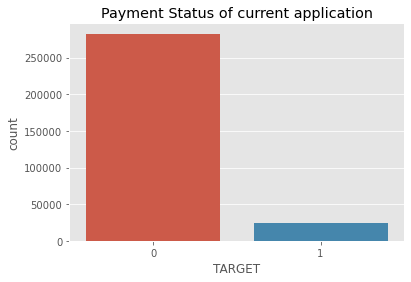

In [12]:
plt.title('Payment Status of current application')
sns.countplot(application_df['TARGET'])

In [13]:
non_default = application_df[application_df['TARGET']==0]
default = application_df[application_df['TARGET']==1]

print('NO of defaulters :',len(default))
print('NO of non defaulters :',len(non_default))
print('Percentage of defaulters :',len(default)*100/len(application_df['TARGET']))

NO of defaulters : 24825
NO of non defaulters : 282686
Percentage of defaulters : 8.072881945686495


#### Comment:
- This data is highly imbalance as the no. of defaulters is very less in total records 

## Segment 1 : Documents submitted by the applicant

Here we are analyzing 'FLAG_DOCUMENT_2','FLAG_DOCUMENT_3',....,'FLAG_DOCUMENT_21' columns. Our goal is to identify weather the trend of documents submittion impacts the TARGET variable. 

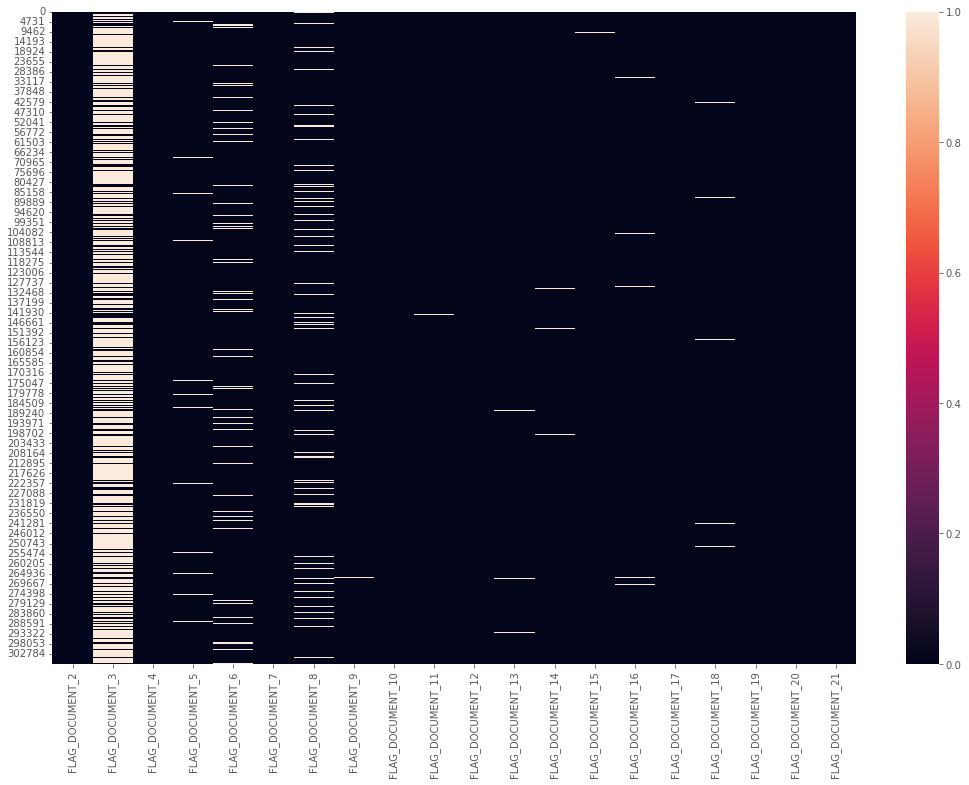

In [14]:
starting_idx = application_df.columns.get_loc('FLAG_DOCUMENT_2')
end_idx = application_df.columns.get_loc('FLAG_DOCUMENT_21')+1

plt.figure(figsize=(18,12))
sns.heatmap(application_df.iloc[:,starting_idx:end_idx])
plt.show()

#### Comment :
- The heatmap shows that all the documents except Documents 3 are not provided by the applicants.
- So all the others columns can be droped as it will not contribute towards analyzing the data.

<AxesSubplot:title={'center':'Document 3 submitted'}, xlabel='TARGET', ylabel='count'>

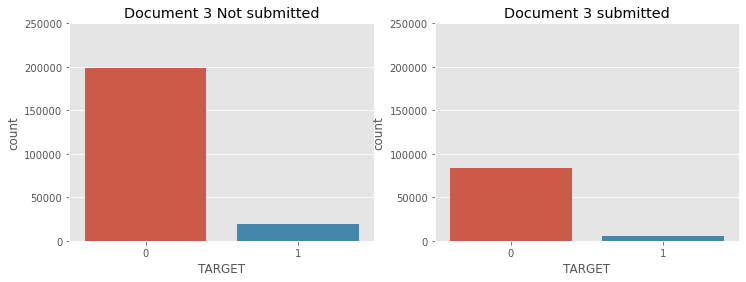

In [15]:
fig = plt.figure(figsize=(12,4))

ax1 = fig.add_subplot(1,2,1, ylim=(0,250000), title = 'Document 3 Not submitted')
ax2 = fig.add_subplot(1,2,2, ylim=(0,250000), title = 'Document 3 submitted')

sns.countplot(application_df[application_df['FLAG_DOCUMENT_3']==1]['TARGET'], ax=ax1)
sns.countplot(application_df[application_df['FLAG_DOCUMENT_3']==0]['TARGET'], ax=ax2)

#### Comment :
- Document 3 submittion is not showing any significant change in default as it is showing similar trend
- Hence, this column can be droped.

## Segment 2 : Housing Information of Applicant

In [16]:
start_idx = application_df.columns.get_loc('APARTMENTS_AVG')
end_idx = application_df.columns.get_loc('EMERGENCYSTATE_MODE')

In [17]:
housing_df = application_df.iloc[:,start_idx:end_idx+1]
housing_df['NAME_HOUSING_TYPE'] = application_df['NAME_HOUSING_TYPE']
housing_df['TARGET'] = application_df['TARGET']

In [18]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 49 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   APARTMENTS_AVG                151450 non-null  float64
 1   BASEMENTAREA_AVG              127568 non-null  float64
 2   YEARS_BEGINEXPLUATATION_AVG   157504 non-null  float64
 3   YEARS_BUILD_AVG               103023 non-null  float64
 4   COMMONAREA_AVG                92646 non-null   float64
 5   ELEVATORS_AVG                 143620 non-null  float64
 6   ENTRANCES_AVG                 152683 non-null  float64
 7   FLOORSMAX_AVG                 154491 non-null  float64
 8   FLOORSMIN_AVG                 98869 non-null   float64
 9   LANDAREA_AVG                  124921 non-null  float64
 10  LIVINGAPARTMENTS_AVG          97312 non-null   float64
 11  LIVINGAREA_AVG                153161 non-null  float64
 12  NONLIVINGAPARTMENTS_AVG       93997 non-null

In [19]:
missingdata_percentage(housing_df)

,category,percentage
32,COMMONAREA_MEDI,69.872297
4,COMMONAREA_AVG,69.872297
18,COMMONAREA_MODE,69.872297
26,NONLIVINGAPARTMENTS_MODE,69.432963
40,NONLIVINGAPARTMENTS_MEDI,69.432963
12,NONLIVINGAPARTMENTS_AVG,69.432963
42,FONDKAPREMONT_MODE,68.386172
38,LIVINGAPARTMENTS_MEDI,68.354953
24,LIVINGAPARTMENTS_MODE,68.354953
10,LIVINGAPARTMENTS_AVG,68.354953


#### Comment :
- All the fretures have very high percentage of missing values(47% to70%), thus all the columns can be droped.

Text(0.5, 1.0, 'HOUSING_TYPE Vs TARGET')

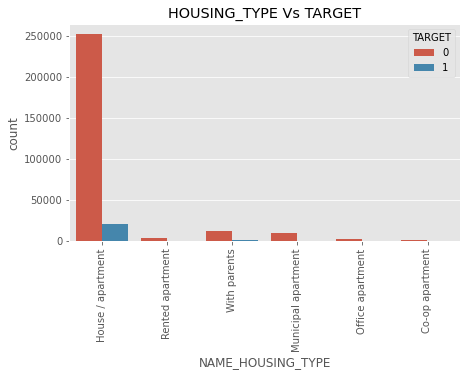

In [20]:
plt.figure(figsize=(7,4))
sns.countplot(application_df['NAME_HOUSING_TYPE'], hue=application_df['TARGET'])
plt.xticks(rotation=90)
plt.title('HOUSING_TYPE Vs TARGET')


In [21]:
values_wise_default_percentage(application_df,'NAME_HOUSING_TYPE')

,Values,Count of Value,Percentage of Defaulters
1,Rented apartment,4881,12.313051
2,With parents,14840,11.698113
3,Municipal apartment,11183,8.539748
5,Co-op apartment,1122,7.932264
0,House / apartment,272868,7.795711
4,Office apartment,2617,6.572411


#### Comment :
- Most of the applicants live in House / apartment.
- Rented apartment and With parents have higher chance of default. 

## Segment 3 :Social Circle Info

In [22]:
start_idx = application_df.columns.get_loc('OBS_30_CNT_SOCIAL_CIRCLE')
end_idx = application_df.columns.get_loc('DEF_60_CNT_SOCIAL_CIRCLE')

social_circle_df = application_df.iloc[:,start_idx:end_idx+1]
social_circle_df.head()

,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE
0,2.0,2.0,2.0,2.0
1,1.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0
3,2.0,0.0,2.0,0.0
4,0.0,0.0,0.0,0.0


In [23]:
social_circle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 4 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   OBS_30_CNT_SOCIAL_CIRCLE  306490 non-null  float64
 1   DEF_30_CNT_SOCIAL_CIRCLE  306490 non-null  float64
 2   OBS_60_CNT_SOCIAL_CIRCLE  306490 non-null  float64
 3   DEF_60_CNT_SOCIAL_CIRCLE  306490 non-null  float64
dtypes: float64(4)
memory usage: 9.4 MB


In [24]:
social_circle_df.describe()

,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE
count,306490.000000,306490.000000,306490.000000,306490.000000
mean,1.422245,0.143421,1.405292,0.100049
std,2.400989,0.446698,2.379803,0.362291
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,2.000000,0.000000
max,348.000000,34.000000,344.000000,24.000000


<AxesSubplot:>

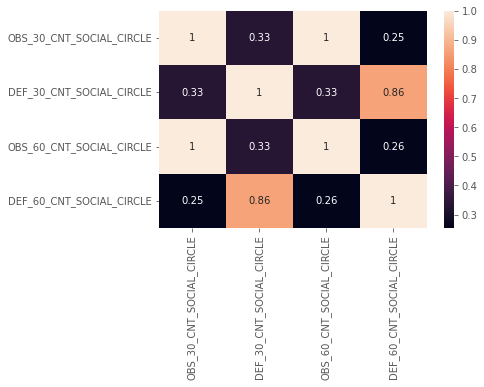

In [25]:
sns.heatmap(social_circle_df.corr(), annot=True)

#### Comment :
- DEF_30_CNT_SOCIAL_CIRCLE and DEF_60_CNT_SOCIAL_CIRCLE are highly correlated.
- OBS_30_CNT_SOCIAL_CIRCLE and OBS_60_CNT_SOCIAL_CIRCLE are identical columns.

## Segment 4 : Region related data

In [26]:
start_idx = application_df.columns.get_loc('REG_REGION_NOT_LIVE_REGION')
end_idx = application_df.columns.get_loc('LIVE_CITY_NOT_WORK_CITY')

region_df = application_df.iloc[:,start_idx:end_idx+1]
region_df.head()

,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,1,1


In [27]:
region_df['REGION_RATING_CLIENT'] = application_df['REGION_RATING_CLIENT']
region_df['REGION_RATING_CLIENT_W_CITY'] = application_df['REGION_RATING_CLIENT_W_CITY']
region_df['TARGET'] = application_df['TARGET']

<AxesSubplot:>

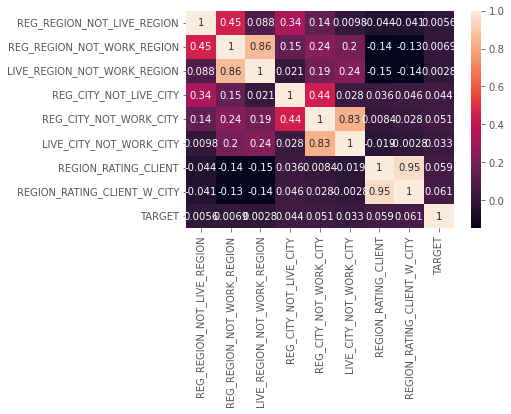

In [28]:
sns.heatmap(region_df.corr(), annot=True)

#### Comment :
- All the features are labeled 0 or 1.
- REG_REGION_NOT_WORK_REGION, LIVE_REGION_NOT_WORK_REGION columns are identical, hence one of them can be removed.
- REG_REGION_NOT_WORK_REGION, LIVE_REGION_NOT_WORK_REGION columns are identical, hence one of them can be removed.
- REGION_RATING_CLIENT, REGION_RATING_CLIENT_W_CITY columns are identical, hence one of them can be removed.

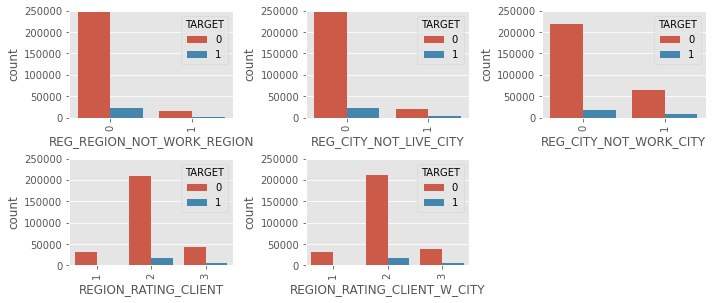

In [29]:
fig=plt.subplots(figsize=(10, 10))

for i, j in enumerate(['REG_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY','REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY']):
    plt.subplot(5, 3, i+1, ylim=(0, 250000))
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(application_df[j], hue=application_df['TARGET'])
    plt.xticks(rotation=90)
    plt.tight_layout()

#### Comment:

- Defaulter rate is highest when REG_REGION_NOT_WORK_REGION=0 i.e. permanent address and working address is same
- Highest Applicants have Region rating of 2

## Segment 5: Contact Related Info

In [30]:
contact_df = application_df[['FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','DAYS_LAST_PHONE_CHANGE', 'TARGET']]

In [31]:
contact_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   FLAG_MOBIL              307511 non-null  int64  
 1   FLAG_EMP_PHONE          307511 non-null  int64  
 2   FLAG_WORK_PHONE         307511 non-null  int64  
 3   FLAG_CONT_MOBILE        307511 non-null  int64  
 4   FLAG_PHONE              307511 non-null  int64  
 5   FLAG_EMAIL              307511 non-null  int64  
 6   DAYS_LAST_PHONE_CHANGE  307510 non-null  float64
 7   TARGET                  307511 non-null  int64  
dtypes: float64(1), int64(7)
memory usage: 18.8 MB


<AxesSubplot:>

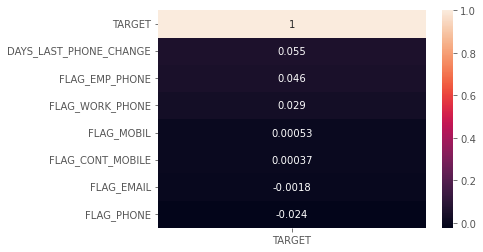

In [32]:
sns.heatmap(contact_df.corr()[['TARGET']].sort_values('TARGET', ascending=False), annot=True)

#### Comment:

- All the features in contact_df are categorical (0 and 1)

- As there is no similarity of patterns of TARGET value with the features, we are assuming the feature are not useful for analysis.

- Hence all of the features can be removed

## Segment 6: Asset Details

In [33]:
asset_df = application_df[['FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'OWN_CAR_AGE', 'TARGET']]

In [34]:
asset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   FLAG_OWN_CAR     307511 non-null  object 
 1   FLAG_OWN_REALTY  307511 non-null  object 
 2   OWN_CAR_AGE      104582 non-null  float64
 3   TARGET           307511 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 9.4+ MB


<AxesSubplot:xlabel='FLAG_OWN_REALTY', ylabel='count'>

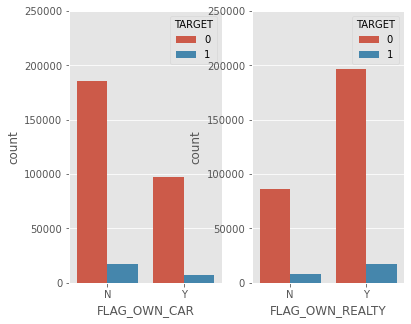

In [35]:
fig = plt.figure(figsize=(6,5))

ax1 = fig.add_subplot(1,2,1, ylim = (0,250000))
ax2 = fig.add_subplot(1,2,2, ylim = (0,250000))

sns.countplot(asset_df['FLAG_OWN_CAR'], hue=application_df['TARGET'], ax=ax1)
sns.countplot(asset_df['FLAG_OWN_REALTY'], hue=application_df['TARGET'], order=('N','Y'), ax=ax2)


In [36]:
values_wise_default_percentage(asset_df,'FLAG_OWN_CAR')

,Values,Count of Value,Percentage of Defaulters
0,N,202924,8.500227
1,Y,104587,7.24373


In [37]:
values_wise_default_percentage(asset_df,'FLAG_OWN_REALTY')

,Values,Count of Value,Percentage of Defaulters
1,N,94199,8.324929
0,Y,213312,7.961577


#### Comment:

- Most of the applicants own realty
- Most of the applicants do not own cars
- People not owning reality and car and have a slightly higher default rate than the people who own reality and car

## Segment 7: Family Related Info

In [38]:
family_df = application_df[['CNT_CHILDREN','CNT_FAM_MEMBERS','NAME_FAMILY_STATUS']]
family_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CNT_CHILDREN        307511 non-null  int64  
 1   CNT_FAM_MEMBERS     307509 non-null  float64
 2   NAME_FAMILY_STATUS  307511 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 7.0+ MB


In [39]:
family_df.dropna(subset=['CNT_FAM_MEMBERS'], inplace=True)

In [40]:
family_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307509 entries, 0 to 307510
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CNT_CHILDREN        307509 non-null  int64  
 1   CNT_FAM_MEMBERS     307509 non-null  float64
 2   NAME_FAMILY_STATUS  307509 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 9.4+ MB


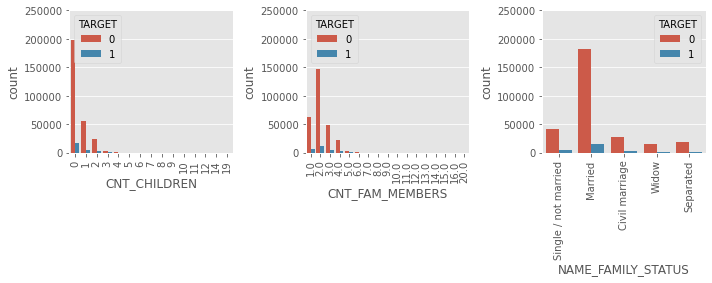

In [41]:
fig = plt.figure(figsize=(10,10))

for i,j in enumerate(family_df.columns):
    plt.subplot(3,3, i+1, ylim=(0,250000))
    plt.subplots_adjust(hspace=1.0)
    sns.countplot(family_df[j], hue= application_df['TARGET'])
    plt.xticks(rotation=90)
    plt.tight_layout()

In [42]:
values_wise_default_percentage(application_df,'CNT_CHILDREN')

,Values,Count of Value,Percentage of Defaulters
9,9.0,2.0,100.0
10,11.0,1.0,100.0
7,6.0,21.0,28.571429
4,4.0,429.0,12.820513
3,3.0,3717.0,9.631423
1,1.0,61119.0,8.923575
2,2.0,26749.0,8.721821
6,5.0,84.0,8.333333
0,0.0,215371.0,7.711809
5,7.0,7.0,0.0


In [43]:
values_wise_default_percentage(application_df,'NAME_FAMILY_STATUS')

,Values,Count of Value,Percentage of Defaulters
2,Civil marriage,29775,9.944584
0,Single / not married,45444,9.807675
4,Separated,19770,8.194234
1,Married,196432,7.559868
3,Widow,16088,5.824217
5,Unknown,2,0.0


In [44]:
application_df.dropna(subset='CNT_FAM_MEMBERS', inplace=True)
application_df['CNT_FAM_MEMBERS'] = application_df['CNT_FAM_MEMBERS'].astype(int)

In [45]:
application_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307509 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(64), int32(1), int64(41), object(16)
memory usage: 287.4+ MB


In [46]:
values_wise_default_percentage(application_df,'CNT_FAM_MEMBERS')

,Values,Count of Value,Percentage of Defaulters
16,11.0,1.0,100.0
10,13.0,1.0,100.0
9,10.0,3.0,33.333333
8,8.0,20.0,30.0
5,6.0,408.0,13.480392
4,5.0,3478.0,9.401955
2,3.0,52601.0,8.76029
3,4.0,24697.0,8.648824
0,1.0,67847.0,8.364408
1,2.0,158357.0,7.583498


#### Comment :
- Default rate is highest for Civil Marriage and Single applicants
- Most of the applicants are married (and/or) no children (and/or) 2 family members.
- Applicants with relatively more number of children (and/or) family members have higher default percentage.
- For some of the cases where count children/family members is high, and the default rate is very high or very low. This cases cannot be taken as a conclusion as number of applicants having a large family is very low.


## Segment 8: Education and Occupation Info

Text(0.5, 1.0, 'Income vs. Target')

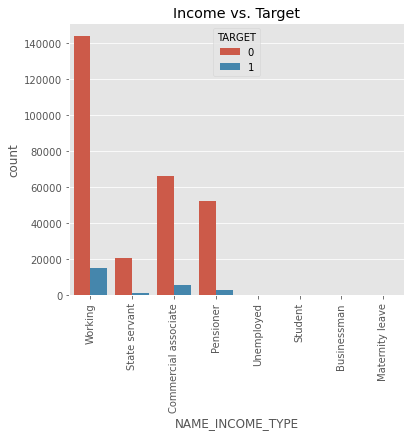

In [47]:
plt.figure(figsize=(6,5))
sns.countplot(application_df['NAME_INCOME_TYPE'], hue=application_df['TARGET'])
plt.xticks(rotation=90)
plt.title('Income vs. Target')

In [48]:
values_wise_default_percentage(application_df,'NAME_INCOME_TYPE')

,Values,Count of Value,Percentage of Defaulters
7,Maternity leave,5,40.0
4,Unemployed,22,36.363636
0,Working,158774,9.588472
2,Commercial associate,71615,7.484466
1,State servant,21703,5.754965
3,Pensioner,55362,5.386366
5,Student,18,0.0
6,Businessman,10,0.0


#### Comment :
- Most of the applicants are working.
- Applicants on Maternity Leave and Unemployed has highest percentage of Defaulter.
- Businessman have lowest (0) percentage of Defaulter However applicants of income type('Unemployed', 'Student', 'Businessman', 'Maternity leave') are very few in the dataset to contribute in the analysis.

In [49]:
values_wise_default_percentage(application_df,'NAME_EDUCATION_TYPE')

,Values,Count of Value,Percentage of Defaulters
3,Lower secondary,3815,10.930537
0,Secondary / secondary special,218391,8.939929
2,Incomplete higher,10277,8.484966
1,Higher education,74862,5.355187
4,Academic degree,164,1.829268


#### Comment :
- Applicants having "Lower secondary" education have highest percentage of Defaulter.
- We can see a trend here that as the education level increase there is a decreace in defaults.

In [50]:
application_df['OCCUPATION_TYPE'] = application_df['OCCUPATION_TYPE'].fillna('unknown')

In [51]:
values_wise_default_percentage(application_df,'OCCUPATION_TYPE')

,Values,Count of Value,Percentage of Defaulters
14,Low-skill Laborers,2093,17.152413
5,Drivers,18603,11.32613
13,Waiters/barmen staff,1348,11.275964
11,Security staff,6721,10.742449
0,Laborers,55186,10.57877
8,Cooking staff,5946,10.443996
6,Sales staff,32102,9.631799
7,Cleaning staff,4653,9.606705
15,Realty agents,751,7.856192
16,Secretaries,1305,7.049808


#### Comment :
- Low skilled labourers have very high rate of defaulters in comparison to other occupations.
- High paying job people have low default rate.

<AxesSubplot:xlabel='CODE_GENDER', ylabel='count'>

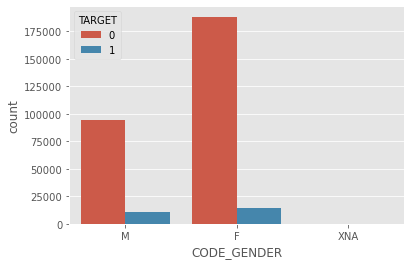

In [52]:
sns.countplot(application_df['CODE_GENDER'], hue=application_df['TARGET'])


In [53]:
values_wise_default_percentage(application_df,'CODE_GENDER')

,Values,Count of Value,Percentage of Defaulters
0,M,105058,10.142017
1,F,202447,6.999363
2,XNA,4,0.0


#### Comment :
- Female applicants are more than male applicants
- Defaulter percentage is higher for male applicants


In [54]:
# Converting DAYS_BIRTH into Age

application_df['Age'] = application_df['DAYS_BIRTH']//-356
application_df.drop('DAYS_BIRTH', axis=1, inplace=True)
application_df[['Age']].describe()

,Age
count,307509.000000
mean,44.549054
std,12.263424
min,21.000000
25%,34.000000
50%,44.000000
75%,55.000000
max,70.000000


<AxesSubplot:title={'center':'Defaulters'}, xlabel='Age', ylabel='Density'>

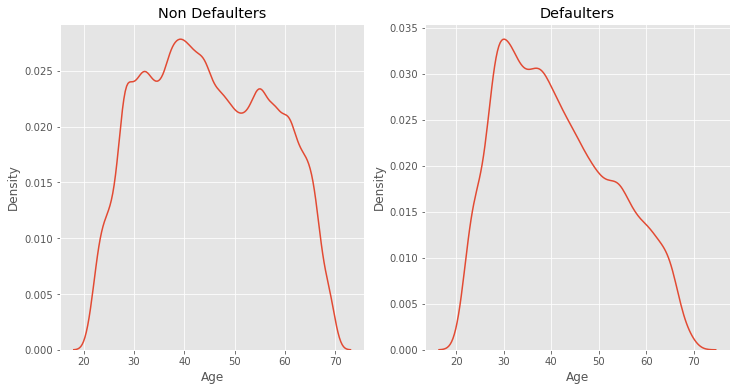

In [55]:
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1,2,1, title = 'Non Defaulters')
ax2 = fig.add_subplot(1,2,2, title = 'Defaulters')

sns.kdeplot(application_df[application_df['TARGET']==0]['Age'], ax=ax1)
sns.kdeplot(application_df[application_df['TARGET']==1]['Age'], ax=ax2)


#### Comment:

- People of age 30 have higher default rate.
- Default cases are less for applicants more than 40 years old.

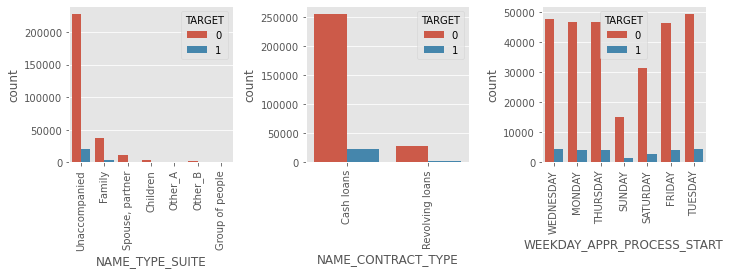

In [56]:
fig = plt.figure(figsize=(10,10))

for i,j in enumerate(['NAME_TYPE_SUITE', 'NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START']):
    plt.subplot(3,3, i+1)
    plt.subplots_adjust(hspace=1.0)
    sns.countplot(application_df[j], hue=application_df['TARGET'])
    plt.xticks(rotation=90)
    plt.tight_layout()

In [57]:
values_wise_default_percentage(application_df,'NAME_CONTRACT_TYPE')

,Values,Count of Value,Percentage of Defaulters
0,Cash loans,278232,8.345913
1,Revolving loans,29277,5.478703


In [58]:
application_df['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [59]:
application_df['NAME_TYPE_SUITE'] = application_df['NAME_TYPE_SUITE'].fillna('unknown')

In [60]:
values_wise_default_percentage(application_df,'NAME_TYPE_SUITE')

,Values,Count of Value,Percentage of Defaulters
6,Other_B,1770,9.830508
4,Other_A,866,8.775982
7,Group of people,271,8.487085
0,Unaccompanied,248526,8.183047
2,"Spouse, partner",11370,7.871592
1,Family,40149,7.494583
3,Children,3267,7.376798
5,unknown,1290,5.426357


#### Comment :
- Most of the applicants are unaccompanied while applying for loan
- Number Cash loans is quite higher than Revolving Loans

## Income and Annuity

<AxesSubplot:xlabel='AMT_ANNUITY'>

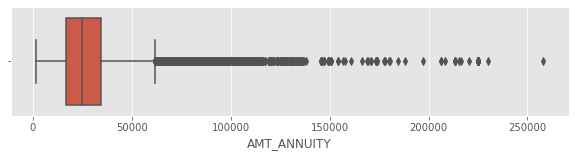

In [61]:
plt.figure(figsize=(10,2))
sns.boxplot(application_df['AMT_ANNUITY'])

<AxesSubplot:xlabel='AMT_INCOME_TOTAL'>

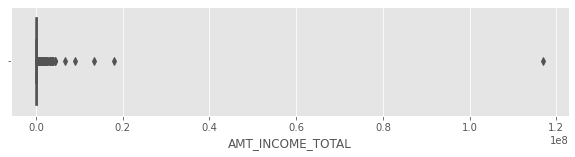

In [62]:
plt.figure(figsize=(10,2))
sns.boxplot(application_df['AMT_INCOME_TOTAL'])

In [63]:
# Boxplot is showing the outliers for income and annuity, there are few entries having very large annuity and income than others.
# Considering this entries will mislead the average income of the entire population and further analysis.

# Excluding values outside 99 percentile for AMT_ANNUITY and AMT_INCOMRE_TOTAL

application_df = application_df[application_df['AMT_ANNUITY'] < np.nanpercentile(application_df['AMT_ANNUITY'],99)]

In [64]:
application_df = application_df[application_df['AMT_INCOME_TOTAL'] < np.nanpercentile(application_df['AMT_INCOME_TOTAL'],99)]

<AxesSubplot:title={'center':'Defaulters'}, xlabel='AMT_INCOME_TOTAL', ylabel='Density'>

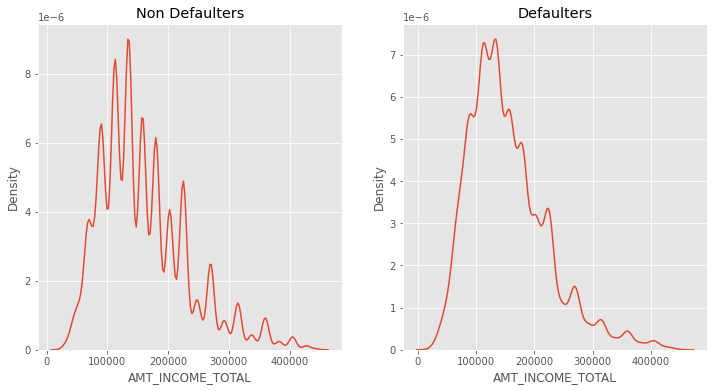

In [65]:
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1,2,1, title = 'Non Defaulters')
ax2 = fig.add_subplot(1,2,2, title = 'Defaulters')

sns.kdeplot(application_df[application_df['TARGET']==0]['AMT_INCOME_TOTAL'], ax=ax1)
sns.kdeplot(application_df[application_df['TARGET']==1]['AMT_INCOME_TOTAL'], ax=ax2)


<AxesSubplot:title={'center':'Defaulters'}, xlabel='AMT_ANNUITY', ylabel='Density'>

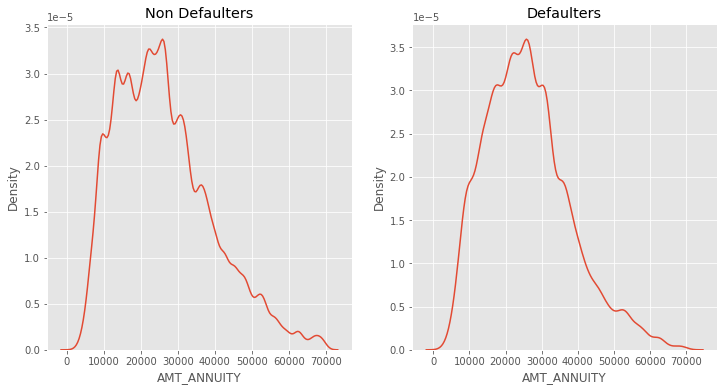

In [66]:
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1,2,1, title = 'Non Defaulters')
ax2 = fig.add_subplot(1,2,2, title = 'Defaulters')

sns.kdeplot(application_df[application_df['TARGET']==0]['AMT_ANNUITY'], ax=ax1)
sns.kdeplot(application_df[application_df['TARGET']==1]['AMT_ANNUITY'], ax=ax2)


#### Comment :
- For Defaulters and non-defaulters AMT_ANNUITY distribution is similar.


<AxesSubplot:title={'center':'Defaulters'}, xlabel='AMT_GOODS_PRICE', ylabel='AMT_CREDIT'>

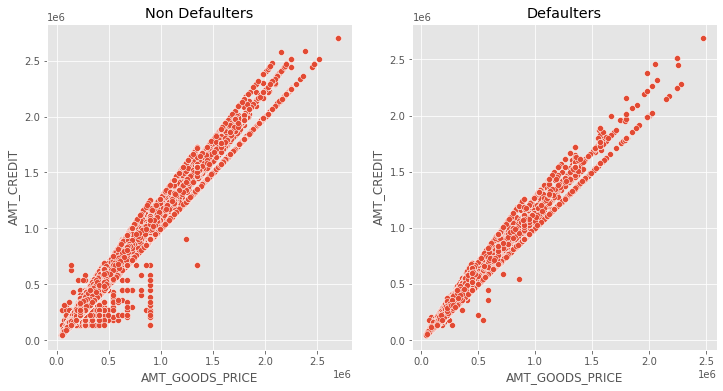

In [69]:
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1,2,1, title = 'Non Defaulters')
ax2 = fig.add_subplot(1,2,2, title = 'Defaulters')

sns.scatterplot(application_df[application_df['TARGET']==0]['AMT_GOODS_PRICE'],application_df[application_df['TARGET']==0]['AMT_CREDIT'], ax=ax1)
sns.scatterplot(application_df[application_df['TARGET']==1]['AMT_GOODS_PRICE'],application_df[application_df['TARGET']==1]['AMT_CREDIT'], ax=ax2)


#### Comment:

- AMT_CREDIT and AMT_GOODS_PRICE have linear relation.
- For lower range of AMT_CREDIT and AMT_GOODS_PRICE, amount of defaulters is less than that of non-defaulters.

In [70]:
ext_df = application_df[['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3']]

In [72]:
ext_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299463 entries, 0 to 307510
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   EXT_SOURCE_1  130064 non-null  float64
 1   EXT_SOURCE_2  298814 non-null  float64
 2   EXT_SOURCE_3  240038 non-null  float64
dtypes: float64(3)
memory usage: 9.1 MB


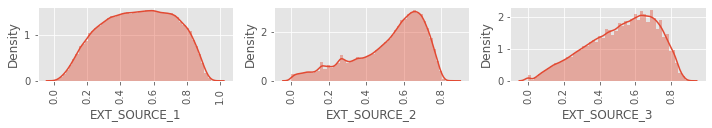

In [75]:
fig = plt.figure(figsize=(10,10))

for i,j in enumerate(ext_df.columns):
    plt.subplot(6,3,i+1)
    plt.subplots_adjust(hspace=1.0)
    sns.distplot(application_df[application_df['TARGET']==0][j])
    plt.xticks(rotation=90)
    plt.tight_layout()


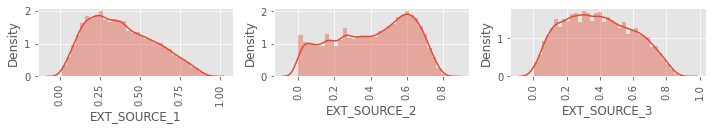

In [77]:
fig = plt.figure(figsize=(10,10))

for i,j in enumerate(ext_df.columns):
    plt.subplot(6,3,i+1)
    plt.subplots_adjust(hspace=1.0)
    sns.distplot(application_df[application_df['TARGET']==1][j])
    plt.xticks(rotation=90)
    plt.tight_layout()

#### Comment:

- 'EXT_SOURCE_1' and 'EXT_SOURCE_3' have very different distribution for defaulters and non-defaulters.

## Top 10 correlation for Defaulters

In [79]:
default_corr = default.corr()

In [83]:
default_corr.unstack().sort_values(ascending=False).drop_duplicates().head(11)

SK_ID_CURR                SK_ID_CURR                  1.000000
OBS_60_CNT_SOCIAL_CIRCLE  OBS_30_CNT_SOCIAL_CIRCLE    0.998269
BASEMENTAREA_AVG          BASEMENTAREA_MEDI           0.998250
COMMONAREA_MEDI           COMMONAREA_AVG              0.998107
YEARS_BUILD_MEDI          YEARS_BUILD_AVG             0.998100
NONLIVINGAPARTMENTS_AVG   NONLIVINGAPARTMENTS_MEDI    0.998075
FLOORSMIN_MEDI            FLOORSMIN_AVG               0.997825
LIVINGAPARTMENTS_MEDI     LIVINGAPARTMENTS_AVG        0.997668
FLOORSMAX_MEDI            FLOORSMAX_AVG               0.997187
NONLIVINGAPARTMENTS_MODE  NONLIVINGAPARTMENTS_MEDI    0.997032
ENTRANCES_MEDI            ENTRANCES_AVG               0.996700
dtype: float64

## Top 10 Correlation for Non-defaulters

In [84]:
non_default_corr = non_default.corr()

In [85]:
non_default_corr.unstack().sort_values(ascending=False).drop_duplicates().head(11)

SK_ID_CURR                SK_ID_CURR                  1.000000
YEARS_BUILD_AVG           YEARS_BUILD_MEDI            0.998522
OBS_60_CNT_SOCIAL_CIRCLE  OBS_30_CNT_SOCIAL_CIRCLE    0.998508
FLOORSMIN_MEDI            FLOORSMIN_AVG               0.997202
FLOORSMAX_AVG             FLOORSMAX_MEDI              0.997018
ENTRANCES_AVG             ENTRANCES_MEDI              0.996899
ELEVATORS_AVG             ELEVATORS_MEDI              0.996161
COMMONAREA_AVG            COMMONAREA_MEDI             0.995857
LIVINGAREA_MEDI           LIVINGAREA_AVG              0.995568
APARTMENTS_AVG            APARTMENTS_MEDI             0.995163
BASEMENTAREA_MEDI         BASEMENTAREA_AVG            0.994081
dtype: float64

## Top 5 important columns
Family Info: (Important driving features : 'CNT_FAM_MEMBERS', 'CNT_CHILDREN') i. Most of the applicants are married (and/or) no children (and/or) 2 family members. ii. Applicants with relatively more number of children (and/or) family members have higher default percentage. (For some of the cases where count children/family members is high, and the default rate is very high or very low. This cases cannot be considered for analysis as number of applicants having a large family is very low.)

- Education and Occupation Info: (Important driving features :'NAME_INCOME_TYPE', 'OCCUPATION_TYPE')
- Most of the applicants are working.
- Applicants on Maternity Leave and Unemployed has highest percentage of Defaulter
- Businessman have lowest (0) percentage of Defaulter However applicants of income type('Unemployed', 'Student', 'Businessman', - 'Maternity leave') are very few in the dataset to contribute in the analysis.

### CODE_GENDER

- Female applicants are more than male applicants
- Defauter percentage is higher for male applicants
- XNA values can be replaced with "Unknown"

### DAYS_BIRTH

- A derived column 'Age' from this gave useful information.
- People of age 25-35 have higher default rate
- Default cases are less for applicants more than 40 years old.
- 'EXT_SOURCE_1' and 'EXT_SOURCE_3' have very different distribution for defaulters and non-defaulters. This can be important features.

### Summary :

1. This data is highly imbalanced as number of defaulter is very less in total population.

- 'CNT_FAM_MEMBERS', 'CNT_CHILDREN','NAME_INCOME_TYPE', 'OCCUPATION_TYPE',CODE_GENDER, 'EXT_SOURCE_1' and 'EXT_SOURCE_3' are some of the important driving factors.

1. Documents : Considered features 'FLAG_DOCUMENT_2','FLAG_DOCUMENT_3',...,'FLAG_DOCUMENT_21' for this segment. Majority of the applicants did not submit any documents apart from DOCUMENT_3. FLAG_DOCUMENT_3 has similar impact on defaulters and non-defaulters. Hence these columns can be dropped.

2. Housing: All of the features considered have very high (47-70%) missing data percentage. Hence all these features can be dropped. Plot of 'NAME_HOUSING_TYPE' vs 'TARGET' shows that

- Most of the applicants live in House/Apartment ii. Applicants living with their parents or in rented apartment have higher rate of default.

1. Social Circle Info: The features show similar trend for defaulters and nondefalters, can be dropped.

2. Regional Info: Defaulter rate is highest when REG_REGION_NOT_WORK_REGION=0 i.e. permanent address and working address is same

3. Contact Info : Considered 'FLAG_MOBIL','FLAG_EMP_PHONE' etc for this segment. No impact on Target, features can be dropped.

4. Asset Info : i. Most of the applicants own realty ii. Most of the applicants do not own cars iii. People not owning reality and car and have a slightly higher default rate than the people who own reality and car